In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
cm = plt.cm.RdBu_r

%run Utilyties.ipynb

In [90]:
data = read_data('../data/final/data_complete.json')
h_classification = read_data('../data/final/hashtags_classification.json')

In [91]:
tweet_list = []
for tweet in data:
    tweet_list.append(tweet)

In [92]:
tweet_list = pd.DataFrame(tweet_list)
tweet_list.head()

,tweet_id,user,date,text,hashtags,mentions,retweets,reply_to,quote_to,followers,following,tweets,tweet_classification,user_classification,vip
0,1402892375211614208,federiconosekai,2021-06-10T07:36:21.000Z,ma perché poi dovremmo inginocchiarci? #EURO20...,"[EURO2020, blm]",[],[],[],[],118,239,5430,-1.0,1.047619,0
1,1403004343314305031,LaFranci27,2021-06-10T15:01:16.000Z,@nonkonforme Onore agli ungheresi e all'#Unghe...,"[Euro2020, Ungheria, SouthGate, NoKnees, BLM]",[nonkonforme],[],[nonkonforme],[],10180,4708,4112,-1.0,0.500000,0
2,1403066213069172741,AlexSanna38,2021-06-10T19:07:07.000Z,Applaudire che?? Quella pagliacciata?? https:/...,"[EURO2020, BLM]",[],[],[],[],431,276,13648,-1.0,1.218750,0
3,1403406033826074631,CalcioPillole,2021-06-11T17:37:27.000Z,I tifosi dell'#Inghilterra sono stati incitati...,"[Inghilterra, Euro2020, BlacklivesMatter, FA]",[],[],[],[],8989,5378,16360,-1.0,-1.000000,0
4,1403407082913767429,martina8___,2021-06-11T17:41:37.000Z,RT @CalcioPillole: I tifosi dell'#Inghilterra ...,"[Inghilterra, Euro2020, BlacklivesMatter, FA]","[sapienzaroma, CalcioPillole]",[CalcioPillole],[],[],83,116,156,-1.0,-1.000000,0


# Studio della classificazione delle opinioni $C_{u}$ 

In [93]:
tweet_list = tweet_list[['tweet_id','hashtags','tweet_classification','user','user_classification']]
tweet_list.head()

,tweet_id,hashtags,tweet_classification,user,user_classification
0,1402892375211614208,"[EURO2020, blm]",-1.0,federiconosekai,1.047619
1,1403004343314305031,"[Euro2020, Ungheria, SouthGate, NoKnees, BLM]",-1.0,LaFranci27,0.500000
2,1403066213069172741,"[EURO2020, BLM]",-1.0,AlexSanna38,1.218750
3,1403406033826074631,"[Inghilterra, Euro2020, BlacklivesMatter, FA]",-1.0,CalcioPillole,-1.000000
4,1403407082913767429,"[Inghilterra, Euro2020, BlacklivesMatter, FA]",-1.0,martina8___,-1.000000


In [94]:
# serie di utenti e rispettivo numero di post pubblicati
v = tweet_list.user.value_counts()
v.head(10)

JFSebastian146     454
2014Monaco         177
jobwithinternet    124
DavidUdale         108
idek3339           106
LPincia             90
adrianobusolin      75
Gianmar26145917     70
Francescaeffe3      66
elena_elnmrl15      62
Name: user, dtype: int64

In [95]:
print('numero medio di tweet pubblicati per utente:\t', round(v.mean(),2),'\nvarianza:\t\t\t\t\t', round(v.var(),2))

numero medio di tweet pubblicati per utente:	 2.4 
varianza:					 30.82


In [22]:
occ = int(round(v.mean(),0)) #numero medio di tweets pubblicati per utente approssimato per difetto

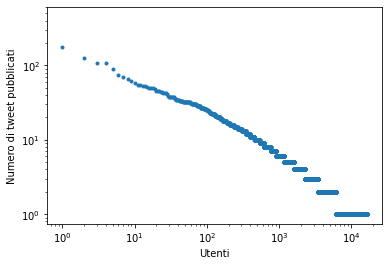

In [23]:
hist = v.values
plt.plot(range(0, len(hist)), hist, ".")
plt.xlabel("Utenti")
plt.ylabel("Numero di tweet pubblicati")
plt.loglog()
plt.show()

In [44]:
list_afavore = []
list_contrari = []
list_neutri = []

media_afavore = []
media_contrari = []

for i in range(5):
    # numero di utenti che hanno pubblicato almeno i+1 tweet
    user_list_occ = tweet_list[tweet_list.user.isin(v.index[v.gt(i)])].groupby('user').mean().round(2)[['user_classification']]
    
    u_afavore = user_list_occ[user_list_occ['user_classification'] <= -0.5].count()[0]
    u_contrari = user_list_occ[user_list_occ['user_classification'] >= 0.5].count()[0]
    u_neutri = user_list_occ[(user_list_occ['user_classification'] > -0.5) & (user_list_occ['user_classification'] < 0.5)].count()[0]
    
    list_afavore.append(u_afavore) # lista del numero di utenti a favore che hanno pubblicato almeno i+1 tweet
    list_contrari.append(u_contrari) # lista del numero di utenti contrari che hanno pubblicato almeno i+1 tweet
    list_neutri.append(u_neutri) # lista numero di utenti neutri che hanno pubblicato almeno i+1 tweet
    
    # numero di medio di tweet di utenti a favore che hanno pubblicato almeno i+1 tweet  
    media_afavore.append((tweet_list[(tweet_list['user_classification'] <= -0.5) & 
                                     (tweet_list.user.isin(v.index[v.gt(i)]))].count()[0])/u_afavore) 
    
    # numero di medio di tweet di utenti contrari che hanno pubblicato almeno i+1 tweet
    media_contrari.append((tweet_list[(tweet_list['user_classification'] >= 0.5) & 
                                      (tweet_list.user.isin(v.index[v.gt(i)]))].count()[0])/u_contrari)

# df per plot
users_occ = pd.DataFrame({'Pro': list_afavore,
                          'Contro': list_contrari,
                          'Neutri': list_neutri})

media_tweet = pd.DataFrame({'Pro': media_afavore,
                          'Contro': media_contrari})

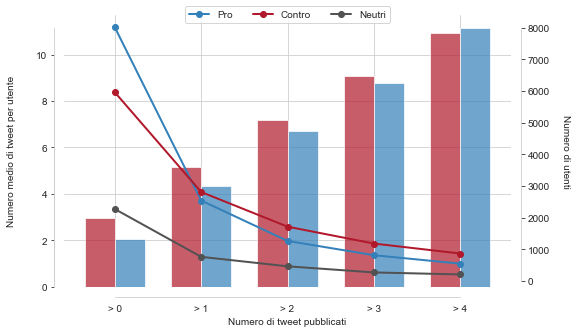

In [45]:
x = np.arange(5)
width = 0.35  # ampiezza dei tweet

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x + width/2, media_afavore, width, color = '#3480b9', alpha=.7)
ax.bar(x - width/2, media_contrari, width, color = '#b1182b', alpha=.7)

ax.set_ylabel('Numero medio di tweet per utente', labelpad=20)
ax.set_xticks(x)
ax2 = ax.twinx()

ax2.plot(users_occ['Pro'],
         linestyle='-',
         marker='o', color = '#3480b9', linewidth=2, label='Pro')

ax2.plot(users_occ['Contro'],
         linestyle='-',
         marker='o', color = '#b1182b', linewidth=2, label='Contro')

ax2.plot(users_occ['Neutri'],
         linestyle='-',
         marker='o', color = '#525252', linewidth=2, label='Neutri')

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=False)

sns.despine(top=True, right=True, left=False, bottom=False, offset=10, trim=True)
sns.despine(top=True, right=False, left=False, bottom=True, offset=10, trim=True, ax = ax2)

ax2.set_ylabel('Numero di utenti', rotation=-90, labelpad=20)
ax2.xaxis.grid(False) # Show the vertical gridlines
ax2.yaxis.grid(False) # Hide the horizontal gridlines

plt.xticks(range(5), ['> 0','> 1','> 2','> 3','> 4'])
ax.set_xlabel("Numero di tweet pubblicati")
plt.show()

In [32]:
# lista di utenti con classificazione media 
user_list = tweet_list.groupby('user').mean().round(2)[['user_classification']] 

# lista di utenti che hanno pubblicato almeno due tweet 
user_list_occ = tweet_list[tweet_list.user.isin(v.index[v.gt(1)])].groupby('user').mean().round(2)[['user_classification']]  

print(f'Di {user_list.shape[0]} utenti solo {user_list_occ.shape[0]} hanno pubblicato più di un tweet durante il dibattito')

Di 16235 utenti solo 6107 hanno pubblicato più di un tweet durante il dibattito


In [56]:
n_tweets_c = tweet_list[tweet_list['user_classification'] >= 0.5].count()[0] # numero di tweet contrari
n_users_c = user_list[user_list['user_classification'] >= 0.5].count()[0] # numero di utenti contrari

n_tweets_f = tweet_list[tweet_list['user_classification'] <= -0.5].count()[0] # numero di tweet a favore
n_users_f = user_list[user_list['user_classification'] <= -0.5].count()[0] # numero di utenti a favore

n_tweets_n = tweet_list[(tweet_list['user_classification'] > -0.5) & (tweet_list['user_classification'] < 0.5)].count()[0] # numero di tweet neutri
n_users_n = user_list[(user_list['user_classification'] > -0.5) & (user_list['user_classification'] < 0.5)].count()[0] # numero di utenti neutri


# numero di tweet di utenti a favore che hanno pubblicato almeno due tweet
n_tweets_Af = tweet_list[(tweet_list['user_classification'] <= -0.5) & (tweet_list.user.isin(v.index[v.gt(1)]))].count()[0]

# numero di utenti a favoreche hanno pubblicato almeno due tweet
n_users_Af = user_list_occ[user_list_occ['user_classification'] <= -0.5].count()[0]


# numero di tweet di utenti contrari che hanno pubblicato almeno due tweet
n_tweets_Ac = tweet_list[(tweet_list['user_classification'] >= 0.5) & (tweet_list.user.isin(v.index[v.gt(1)]))].count()[0] 

# numero di utenti contrari che hanno pubblicato almeno due tweet
n_users_Ac = user_list_occ[user_list_occ['user_classification'] >= 0.5].count()[0]


# numero di tweet di utenti neutri che hanno pubblicato almeno due tweet
n_tweets_An = tweet_list[(tweet_list['user_classification'] > -0.5) & (tweet_list['user_classification'] < 0.5) & (tweet_list.user.isin(v.index[v.gt(1)]))].count()[0]

# numero di utenti neutri che hanno pubblicato almeno due tweet
n_users_An = user_list_occ[(user_list_occ['user_classification'] > -0.5) & (user_list_occ['user_classification'] < 0.5)].count()[0]

In [57]:
print(f'Numero totale di tweet: {tweet_list.shape[0]}')

Numero totale di tweet: 38898


In [58]:
print('Tweet a favore: ', n_tweets_f)
print('Tweet contrari: ', n_tweets_c)
print('Tweet neutri o non classificabili: ', n_tweets_n)

Tweet a favore:  16510
Tweet contrari:  17668
Tweet neutri o non classificabili:  4720


In [64]:
print(f'Tweet di utenti autori di almeno 2 tweets')
print('-\t a favore: ', n_tweets_Af)
print('-\t contrari: ', n_tweets_Ac)
print('-\t neutri o non classificabili: ', n_tweets_An)

Tweet di utenti autori di almeno 2 tweets
-	 a favore:  11040
-	 contrari:  14519
-	 neutri o non classificabili:  3211


In [67]:
print('Utenti')
print('-\t a favore: ', n_users_f)
print('-\t contrari: ', n_users_c)
print('-\t neutri o non classificabili: ', n_users_n)

Utenti
-	 a favore:  8009
-	 contrari:  5957
-	 neutri o non classificabili:  2269


In [68]:
print(f'Utenti attivi autori di almeno 2 tweets')
print('-\t a favore: ', n_users_Af)
print('-\t contrari: ', n_users_Ac)
print('-\t neutri o non classificabili: ', n_users_An)

Utenti attivi autori di almeno 2 tweets
-	 a favore:  544
-	 contrari:  865
-	 neutri o non classificabili:  204


In [69]:
print(f'Rapporto tra utenti a favore e numero di tweet pubblicati {round(n_tweets_f/n_users_f, 2)}')
print(f'Rapporto tra utenti contrari e numero di tweet pubblicati {round(n_tweets_c/n_users_c, 2)}')

Rapporto tra utenti a favore e numero di tweet pubblicati 2.06
Rapporto tra utenti contrari e numero di tweet pubblicati 2.97


In [71]:
#num = int(np.sqrt(len(v.index[v.gt(occ)])).round(0)) #radice quadrata del campione 
num = 20

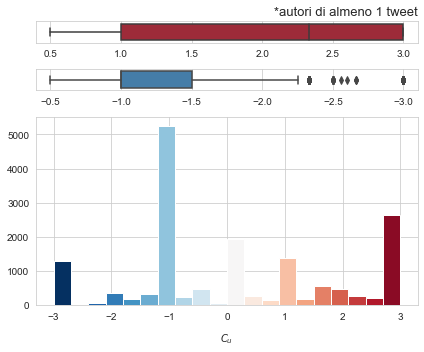

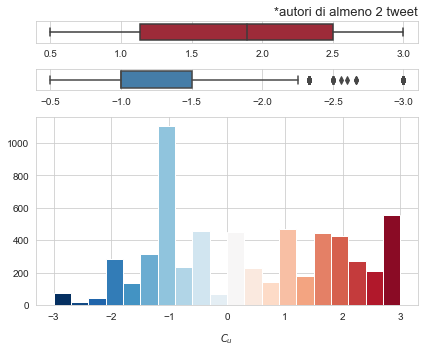

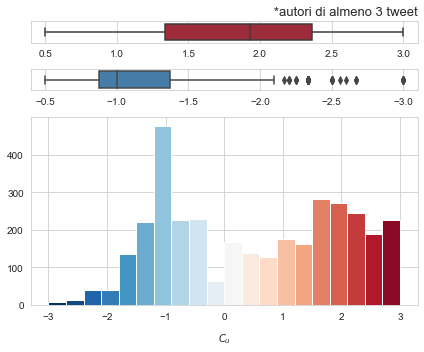

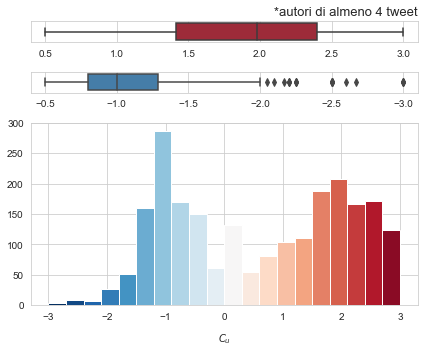

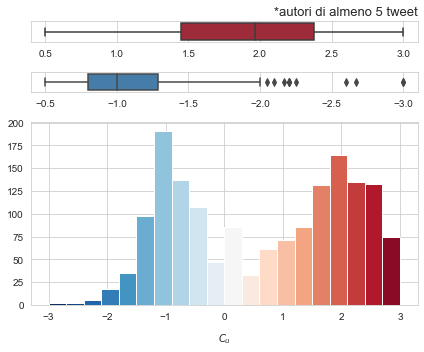

In [77]:
for occ in range(5):
    user_list_occ = tweet_list[tweet_list.user.isin(v.index[v.gt(occ)])].groupby('user').mean()[['user_classification']]

    f, (ax_box, ax_box2, ax_hist) = plt.subplots(3, figsize=(6,5), sharex=False, gridspec_kw={"height_ratios": (.09, .09, .8)})
    f.subplots_adjust(hspace=.07)

    sns.boxplot(x = user_list_occ[user_list_occ['user_classification'] >= 0.5]['user_classification'], 
                color=cm(230), ax=ax_box)

    sns.boxplot(x = user_list_occ[user_list_occ['user_classification'] <= -0.5]['user_classification'], 
                color=cm(40), ax=ax_box2)

    n, bins, patches = plt.hist(user_list_occ['user_classification'], num)
    for i, p in enumerate(patches):
        plt.setp(p, 'facecolor', cm(i/num)) 

    ax_box.set(xlabel='')
    ax_box2.set(xlabel='')

    ax_box.set_xlim(0.4, 3.1)
    ax_box2.set_xlim(-3.1, -0.4)
    ax_box2.invert_xaxis() 

    ax_hist.set_xlabel('$C_{u}$', labelpad=10)

    ax_box.set_title(f'*autori di almeno {occ+1} tweet', loc='right', size=13)

    f.tight_layout()
    plt.show()

# Studio sull'utilizzo degli hashtags

In [96]:
col         = 'user_classification'
conditions  = [ tweet_list[col] >= 0.5, (tweet_list[col] < 0.5) & (tweet_list[col] > -0.5), tweet_list[col] <= -0.5 ]
choices     = [ "contro", 'neutro', 'pro' ]
    
tweet_list["user_classification"] = np.select(conditions, choices, default=np.nan)

tweet_list.head()

,tweet_id,hashtags,tweet_classification,user,user_classification
0,1402892375211614208,"[EURO2020, blm]",-1.0,federiconosekai,contro
1,1403004343314305031,"[Euro2020, Ungheria, SouthGate, NoKnees, BLM]",-1.0,LaFranci27,contro
2,1403066213069172741,"[EURO2020, BLM]",-1.0,AlexSanna38,contro
3,1403406033826074631,"[Inghilterra, Euro2020, BlacklivesMatter, FA]",-1.0,CalcioPillole,pro
4,1403407082913767429,"[Inghilterra, Euro2020, BlacklivesMatter, FA]",-1.0,martina8___,pro


In [97]:
# creazione di un df con i 500 hashtags più utilizzati per la fazione indicata
def get_hashtags_df(fazione, name):
    hash = tweet_list[tweet_list['user_classification']==fazione].drop('user_classification', axis=1)
    hash["hashtags"] = hash["hashtags"].astype(str).str.lower().transform(ast.literal_eval)
    hash["hashtags"].apply(lambda x: tuple(x) if isinstance(x, list) else x).value_counts().head(10)
    tags_dict = {}

    for i in hash["hashtags"]:
        for j in i:
            if j not in tags_dict:
                tags_dict[j] = 1
            else:
                tags_dict[j] += 1

    unique_items = pd.Series(dict(sorted(tags_dict.items(), key=lambda item: item[1], reverse=True)), name = name).head(500)
    return unique_items.to_frame()

In [98]:
unique_items_pro = get_hashtags_df('pro', 'pro_occ')
unique_items_contro = get_hashtags_df('contro', 'contro_occ')

In [99]:
# conteggio dell'utilizzo di ogni hashtag nei df delle due fazioni
hashtags_occ = pd.concat([unique_items_pro, unique_items_contro], axis=1)
hashtags_occ.fillna(0, inplace=True)
hashtags_occ.head()

,pro_occ,contro_occ
blacklivesmatter,9591.0,2798.0
inginocchiarsi,5503.0,4751.0
italiaaustria,3489.0,2910.0
euro2020,2951.0,1743.0
italiabelgio,2266.0,1144.0


In [100]:
# esclusione degli hashtag neutri e/o irrilevanti 
hashtags_occ.drop(['ita','italia','nazionale','azzurri','nazionaleitaliana','vivoazzurro','staseraitalia','forzaazzurri','mancini',
                   'figc','euro2020','euro2021','europei2021','uefa','calcio','bel','marchisio','biani','rampini','nomes','maglia',
                   'fr','belgioportogallo','belpor','itawal','italiagalles','italiaaustria','itaaus','austria','itaaut','belita','italiabelgio','belgioitalia','itabel','belgio','italiainghilterra','itaeng',
                   'chiellini','bonucci','lukaku','spinazzola',
                   'bastasalaridafame','stopcensorship','iostoconilpoliziotto','suningout','nocina','facciamorete','fake','cairovattene','marketing','caffèletterario','bibliophily','ready','socialmedia','digitalmarketing','wp','wordpress','parodyaccount','maratonamentana','news','fbpeglobal','taglioalto','mojo',
                   '25giugno','26giugno','27giugno','28giugno'], inplace=True)

In [106]:
# selezione dei 50 hashtag più utilizzati
hashtags_occ = hashtags_occ.iloc[hashtags_occ.mean(axis=1).argsort()[::-1][:50]]

# normalizzazione degli hashtag con lo stesso significato
hashtags_occ.rename(index={'blm': 'blacklivesmatter','blacklivesmetter':'blacklivesmatter',
                           'iononminginocchio':'iononmiinginocchio', 'nonmiinginocchio':'iononmiinginocchio', 
                           'iominginocchio':'iomiinginocchio', 'miinginocchio':'iomiinginocchio', 
                           'antifa':'antifascista',
                           'endracism':'antirazzismo','antirazzista':'antirazzismo','noracism':'antirazzismo',
                           'noue':'noeuro'
                          }, inplace=True)
hashtags_occ = hashtags_occ.sum(level=0) # conteggio aggiornato

In [107]:
# selezione degli hashtag più utilizzati
hashtags_general = hashtags_occ.loc[['inginocchiarsi','blacklivesmatter','iononmiinginocchio','iomiinginocchio']]
hashtags_general

,pro_occ,contro_occ
inginocchiarsi,5503.0,4751.0
blacklivesmatter,11896.0,3634.0
iononmiinginocchio,2191.0,14320.0
iomiinginocchio,1598.0,119.0


In [109]:
hashtags_occ.drop(['inginocchiarsi','blacklivesmatter','iononmiinginocchio','iomiinginocchio'], inplace=True)

In [110]:
# hashtag riordinati in base all'utilizzo da parte degli utenti a favore
hashtags_occ.sort_values(by=['pro_occ','contro_occ'], ascending = False, inplace=True)

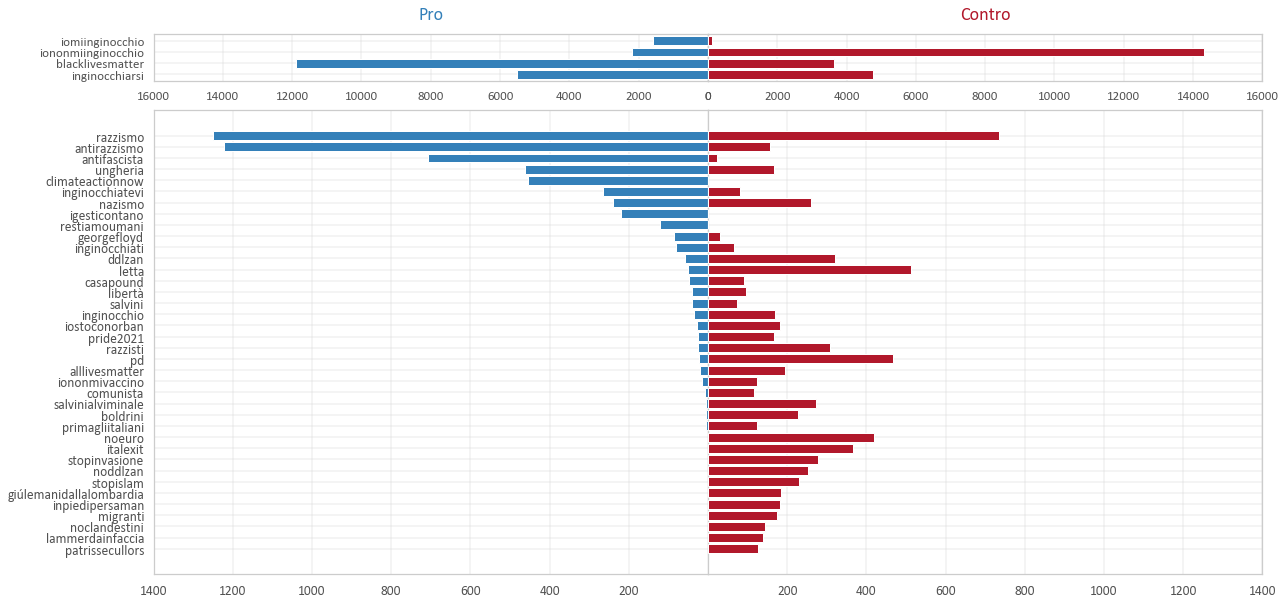

In [285]:
### Plot specifics ###
sns.set_style("whitegrid")
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = 'white'
color_blue = cm(40)
color_red = cm(230)

### Plot data ###
index_f = hashtags_general.index
column0_f = hashtags_general['pro_occ']
column1_f = hashtags_general['contro_occ']

index = hashtags_occ.index
column0 = hashtags_occ['pro_occ']
column1 = hashtags_occ['contro_occ']

title0 = 'Pro'
title1 = 'Contro'

### Plot ###
fig, axes = plt.subplots(figsize=(20,10), facecolor=facecolor, nrows=2, ncols=2, gridspec_kw={
                           'height_ratios': [.2, 2]})
fig.tight_layout()

axes[0,0].get_shared_y_axes().join(axes[0,0], axes[0,1])

axes[0,0].barh(index_f, column0_f, align='center', color=color_blue, zorder=10)
axes[0,0].set_title(title0, fontsize=18, pad=15, color=color_blue, **hfont)
axes[0,1].barh(index_f, column1_f, align='center', color=color_red, zorder=10)
axes[0,1].set_title(title1, fontsize=18, pad=15, color=color_red, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0,0].invert_xaxis() 

axes[0,0].set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000])
axes[0,1].set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000])

axes[0,0].set(yticks=index_f, yticklabels=index_f)
axes[0,0].yaxis.tick_left()
axes[0,0].tick_params(axis='y', colors='white') # tick color
axes[0,1].set(yticks=index_f, yticklabels=[])

for label in (axes[0,0].get_xticklabels() + axes[0,0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[0,1].get_xticklabels() + axes[0,1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
    
axes[1,0].get_shared_y_axes().join(axes[1,0], axes[1,1])
    
axes[1,0].barh(index, column0, align='center', color=color_blue, zorder=10)
axes[1,1].barh(index, column1, align='center', color=color_red, zorder=10)
            
axes[1,0].invert_xaxis() #invert the x-axis of the left plot 
plt.gca().invert_yaxis() # to show data from highest to lowest

axes[1,1].set(yticks=index, yticklabels=[])
axes[1,0].set(yticks=index, yticklabels=index)
axes[1,0].yaxis.tick_left()
axes[1,0].tick_params(axis='y', colors='white') # tick color


axes[1,0].set_xticks([200,400,600,800,1000,1200,1400])
axes[1,0].set_xticklabels([200,400,600,800,1000,1200,1400])
axes[1,1].set_xticks([200,400,600,800,1000,1200,1400])
axes[1,1].set_xticklabels([200,400,600,800,1000,1200,1400])

for label in (axes[1,0].get_xticklabels() + axes[1,0].get_yticklabels()):
    label.set(fontsize=13.5, color=font_color, **hfont)
for label in (axes[1,1].get_xticklabels() + axes[1,1].get_yticklabels()):
    label.set(fontsize=13.5, color=font_color, **hfont)
    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
